In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import json
import pickle 
from arimafd import *
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [110]:
accidents = [...] #NDA

In [111]:
tensors=[]
for i in range(1,7):
    with open(r'C:\data\pickle_arima\ВСЕ_КЕЙСЫ_2\{}array_of_tensor.pickle'.format(i), 'rb') as handle:
        tensors.append(pickle.load(handle))

In [112]:
#  df = pd.DataFrame(tensors[i][0].reshape(len(tensors[i][0]),-1),index=tensors[i][1][-len(tensors[i][0]):])
# df[[1,2]].plot()

In [74]:
summ = pd.DataFrame(np.zeros(len(indices)),index=indices)

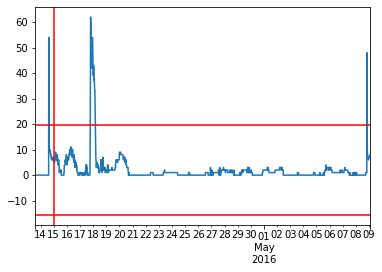

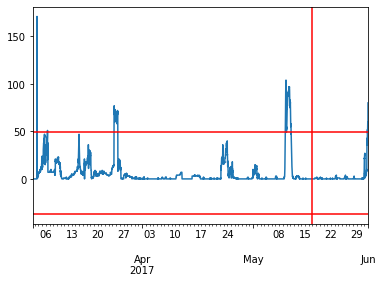

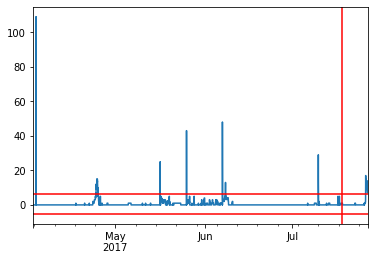

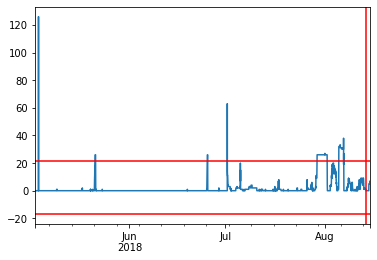

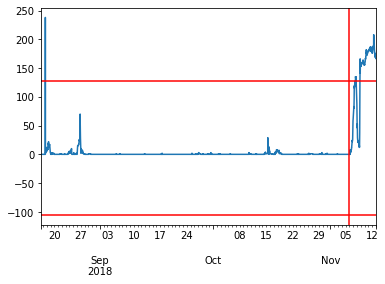

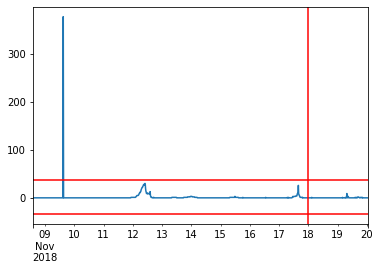

<Figure size 432x288 with 0 Axes>

In [106]:
for j in range(len(tensors)):
    tensor = tensors[j][0]
    indices = tensors[j][1]
    summ = pd.Series(np.zeros(len(indices)),index=indices)
    for i in range(tensor.shape[1]):
        df = pd.DataFrame(tensor[:,i,:],index=indices[-len(tensor):])
        metric = (df.rolling(window).max().abs()/df.rolling(window).std().abs()).mean(axis=1)
        ucl = metric.mean() + 3*metric.std()
        lcl = metric.mean() - 3*metric.std()
        bin_metric = ((metric > ucl) | (metric < lcl)).astype(int)

        summ.loc[bin_metric.index]= summ.loc[bin_metric.index]+bin_metric.values
    #     plt.plot(metric)
    #     plt.axhline(ucl)
    #     plt.axhline(lcl)
    #     plt.title(str(i))
    summ.plot()
    ucl = summ.mean() + 3*summ.std()
    lcl = summ.mean() - 3*summ.std()
    plt.axhline(ucl,c='r')
    plt.axhline(lcl,c='r')
    plt.axvline(accidents[j],c='r')
    plt.show()
    plt.figure()

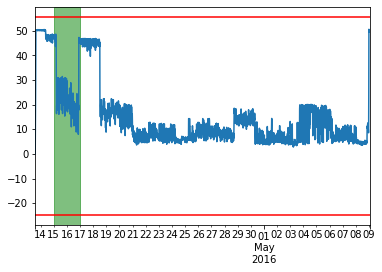

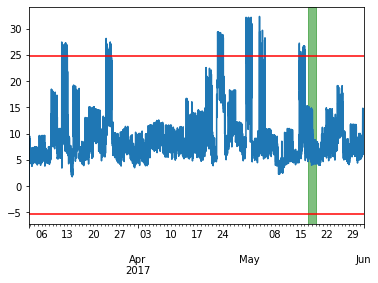

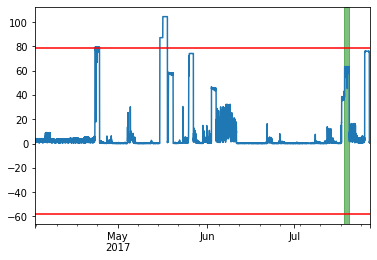

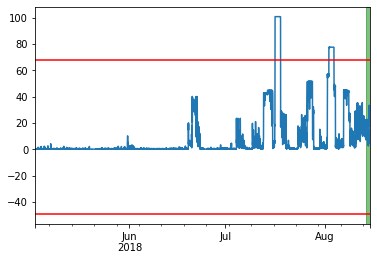

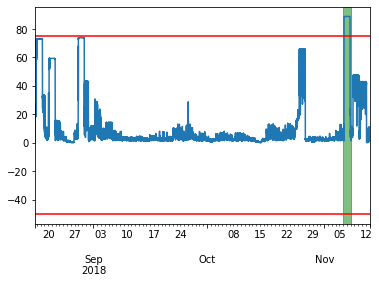

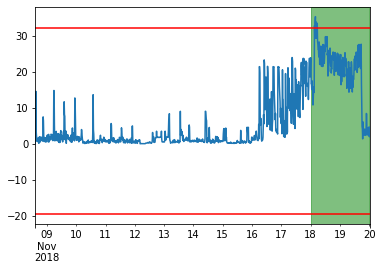

Standart  -  22.410992217161095
LowFP  -  3.1604298843271947
LowFN  -  26.051772589218498


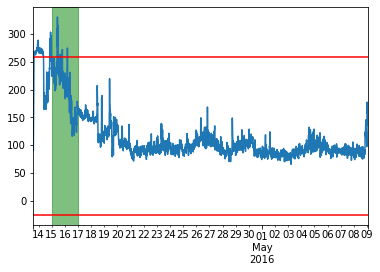

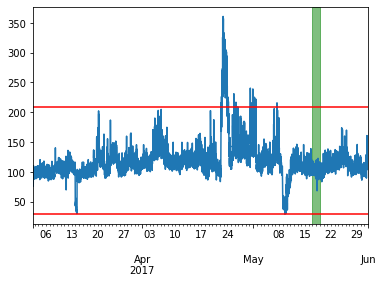

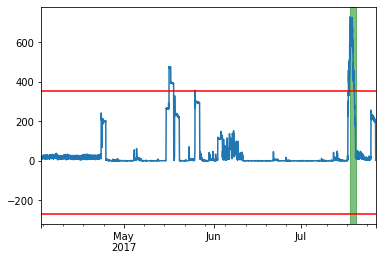

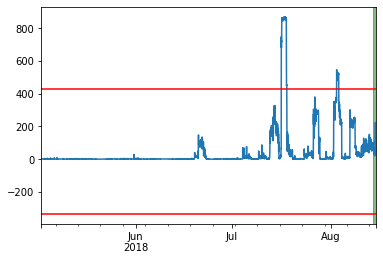

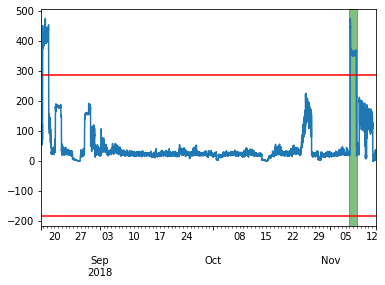

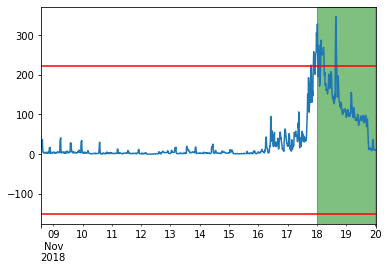

Standart  -  40.907628272441116
LowFP  -  23.490065909049388
LowFN  -  43.938418848294084


<Figure size 432x288 with 0 Axes>

In [113]:
for No_metric in range(2,4):
    list_metrics=[]
    for i in range(0,len(tensors)):
        a = anomaly_detection(pd.DataFrame())
        a.tensor = tensors[i][0]
        a.indices = tensors[i][1]
        a.proc_tensor(No_metric=No_metric)
        a.metric.plot()
        plt.axhline(a.ucl,c='r')
        plt.axhline(a.lcl,c='r')
        acci=[pd.Timestamp(accidents[i]),pd.Timestamp(accidents[i]) + pd.Timedelta(days=2)]
        plt.axvspan(acci[0],acci[1], alpha=0.5, color='green')

        a1,a2,a3 = a.evaluate_nab([acci])
        list_metrics.append(np.array([a1,a2,a3]))
        plt.show()
        plt.figure()
    print('======================')
    print('======================')
    get_score(list_metrics)
    print('======================')
    print('======================')